# Cosine Similarity
Cosine Similarity is the function that calculates the similarity index between two sentences by converting them to the vector embedding and taking the cosine of the angles between them, thu proving us the relation between the text.

🧮 Cosine Similarity Formula: (A.B)/(∥A∥×∥B∥)


C:\Users\Lab\AppData\Local\Temp\ipykernel_7732\134313801.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values(by="Similarity", ascending=False),


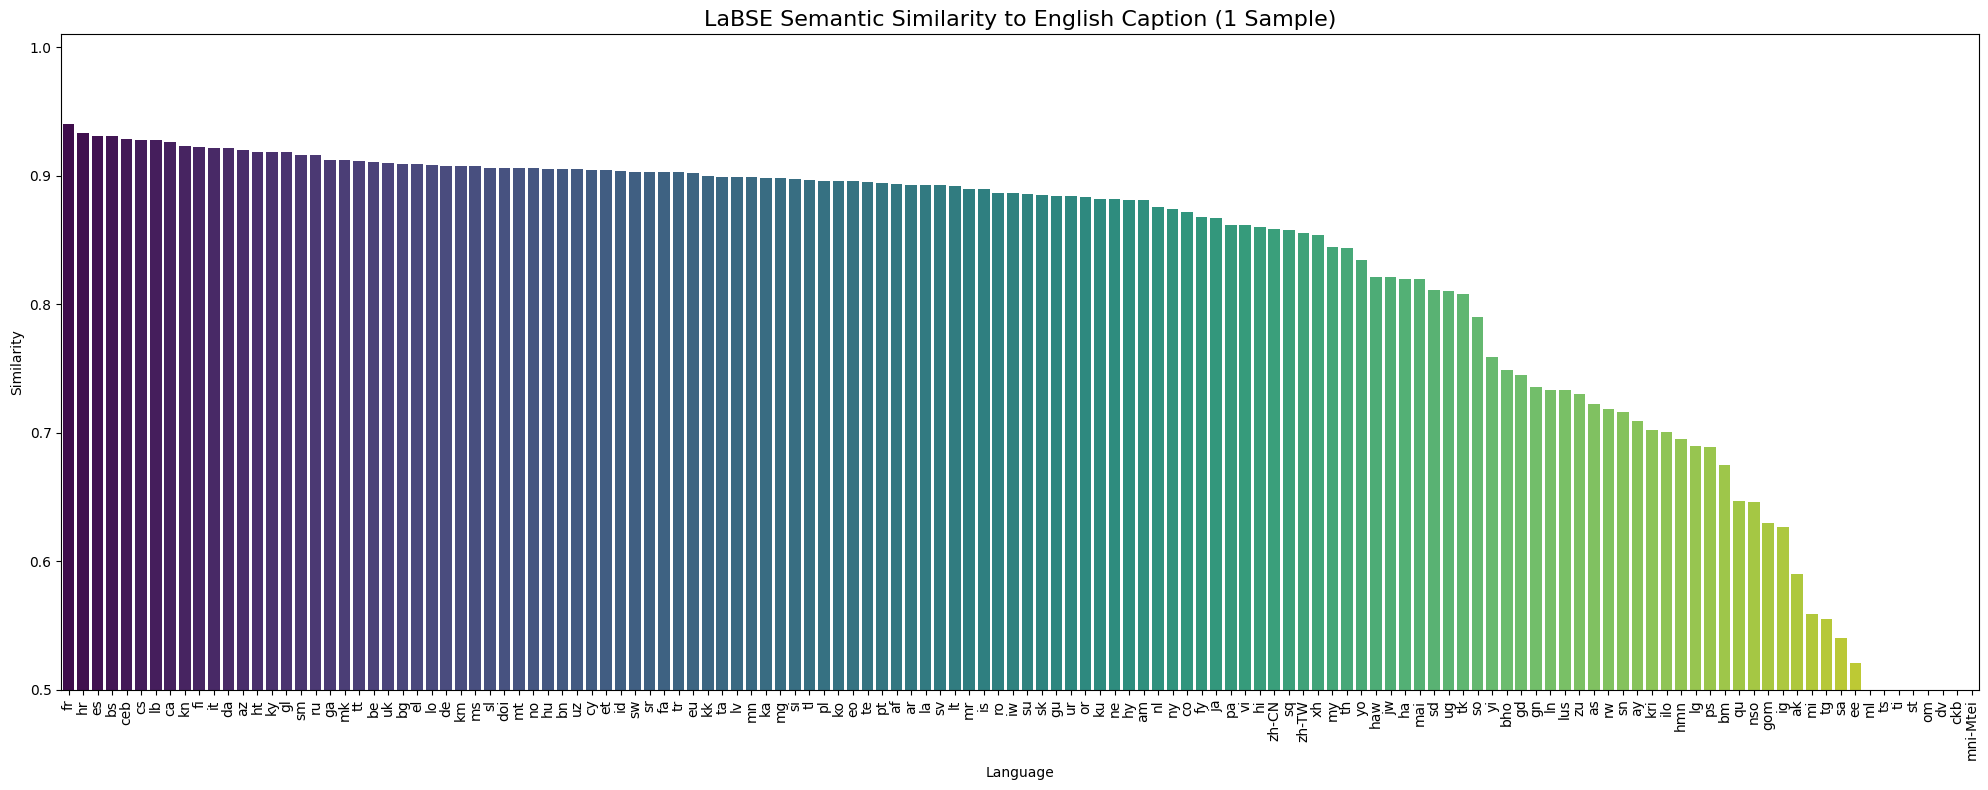

In [ ]:
import json
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- Step 1: Load LaBSE ----------
model = SentenceTransformer("sentence-transformers/LaBSE")

# ---------- Step 2: Load Just One Entry ----------
with open("../Day2/coco_translated_Deep.jsonl", "r", encoding="utf-8") as f:
    first_line = f.readline()
    entry = json.loads(first_line)

# ---------- Step 3: Compute Cosine Similarities ----------
en_text = entry["en_caption"]
other_langs = {k: v for k, v in entry.items() if k.endswith("_caption") and k != "en_caption"}
en_emb = model.encode(en_text, normalize_embeddings=True)
results = []
for lang_key, translated_text in other_langs.items():
    translated_emb = model.encode(translated_text, normalize_embeddings=True)
    sim = cosine_similarity([en_emb], [translated_emb])[0][0]
    results.append({
        "Language": lang_key.replace("_caption", ""),
        "Similarity": sim
    })
    
# ---------- Step 4: Visualize ----------
df = pd.DataFrame(results)

plt.figure(figsize=(20, 8))
sns.barplot(data=df.sort_values(by="Similarity", ascending=False),
            x="Language", y="Similarity", palette="viridis")
plt.title("LaBSE Semantic Similarity to English Caption (1 Sample)", fontsize=16)
plt.xticks(rotation=90)
plt.ylim(0.5, 1.01)
plt.tight_layout()
plt.show()


## Drawback of cosine Similarity

In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer("sentence-transformers/LaBSE")

# Two opposite-meaning sentences
sent1 = "I love this movie."
sent2 = "I hate this movie."

# Encode with normalization
emb1 = model.encode(sent1, normalize_embeddings=True)
emb2 = model.encode(sent2, normalize_embeddings=True)

# Cosine similarity
sim = cosine_similarity([emb1], [emb2])[0][0]
print(f"Cosine similarity between:\n'{sent1}'\nand\n'{sent2}'\nis: {sim:.4f}")


c:\Users\Lab\Desktop\KDD\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Cosine similarity between:
'I love this movie.'
and
'I hate this movie.'
is: 0.9044
